In [1]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [2]:
from haversine import haversine

In [2]:
import pandas as pd

import plotly.express as px

import plotly.graph_objects as go







In [22]:
df = pd.read_csv('/Users/derekaugusto/Desktop/comunidadeDS/Repos/ftc_python/dataset/train.csv')


In [23]:
df1 = df.copy()

#Remover espaço da string
df1.loc[:,'ID'] = df1.loc[:,'ID'].str.strip()
df1.loc[:,'Delivery_person_ID'] = df1.loc[:,'Delivery_person_ID'].str.strip()
df1.loc[:,'Road_traffic_density'] = df1.loc[:,'Road_traffic_density'].str.strip()
df1.loc[:,'Type_of_order'] = df1.loc[:,'Type_of_order'].str.strip()
df1.loc[:,'Type_of_vehicle'] = df1.loc[:,'Type_of_vehicle'].str.strip()
df1.loc[:,'City'] = df1.loc[:,'City'].str.strip()
df1.loc[:,'Festival'] = df1.loc[:,'Festival'].str.strip()




#Excluir as linhas vazias
linhas_selecionadas = (df1['Delivery_person_Age'] != 'NaN ')
df1 = df1.loc[linhas_selecionadas, : ].copy()

linhas_selecionadas = (df1['Road_traffic_density'] != 'NaN ')
df1 = df1.loc[linhas_selecionadas,:].copy()

linhas_selecionadas = (df1['City'] != 'NaN')
df1 = df1.loc[linhas_selecionadas,:].copy()

linhas_selecionadas = (df1['Festival'] != 'NaN')
df1 = df1.loc[linhas_selecionadas,:].copy()


df1['Delivery_person_Age'] = df1['Delivery_person_Age'].astype(int)
df1.shape

#Conversão de texto/categoria/string para numeros inteiros
df1['Delivery_person_Age'] = df1['Delivery_person_Age'].astype(int)

#Conversão de texto/categoria/string para numeros decimais
df1['Delivery_person_Ratings'] =df1['Delivery_person_Ratings'].astype(float)

#Conversão de texto para data
df1['Order_Date'] = pd.to_datetime(df1['Order_Date'],format='%d-%m-%Y' )

#Remove as linhas da coluna multiple_deliveries que tenham o conteudo igual a NaN '
linhas_vazias = df1['multiple_deliveries'] != 'NaN '
df1 = df1.loc[linhas_vazias, :]
df1['multiple_deliveries'] = df1['multiple_deliveries'].astype(int)

#Limpando a coluna de time taken
df1['Time_taken(min)'] = df1['Time_taken(min)'].apply(lambda x: x.split('(min)')[1])
df1['Time_taken(min)'] = df1['Time_taken(min)'].astype(int)

In [24]:
#exercico 1

cols = ['ID','Order_Date']

df_aux = df1.loc[:,cols].groupby('Order_Date').count().reset_index()

import plotly.express as px

px.bar(df_aux, x='Order_Date', y='ID')



In [25]:
#exercicio 2

df1['week_of_year'] = df1['Order_Date'].dt.strftime('%U')

df_aux = df1.loc[:, ['ID','week_of_year']].groupby('week_of_year').count().reset_index()

px.line(df_aux, x='week_of_year', y='ID')

In [8]:
#exercicio 3

df_aux = df1.loc[:,['ID','Road_traffic_density']].groupby('Road_traffic_density').count().reset_index()

df_aux = df_aux.loc[df_aux['Road_traffic_density'] != 'NaN ',:]

df_aux['entregas_perc'] = df_aux['ID'] / df_aux['ID'].sum()

px.pie( df_aux, values='entregas_perc',names='Road_traffic_density')

In [9]:
#exercico 4

cols = ['ID','City','Road_traffic_density']

df_aux = df1.loc[:,cols].groupby(['City','Road_traffic_density']).count().reset_index()

px.scatter(df_aux, x='City', y='Road_traffic_density', size='ID')

In [10]:
#exercicio 5
df_aux = df1.loc[:,['ID','week_of_year']].groupby('week_of_year').count().reset_index()

df_aux2 = df1.loc[:,['Delivery_person_ID','week_of_year']].groupby('week_of_year').nunique().reset_index()

df_aux = pd.merge(df_aux,df_aux2, how='inner')

df_aux['order_by_delivery'] = df_aux['ID'] / df_aux['Delivery_person_ID']

px.line(df_aux, x='week_of_year', y='order_by_delivery')


In [11]:
#Exercicio 1

cols = ['ID','Order_Date']

df_aux = df1.loc[:,cols].groupby('Order_Date').count().reset_index()

px.bar(df_aux, x='Order_Date', y='ID')

In [12]:
df1['week_of_year'] = df1['Order_Date'].dt.strftime("%U")
df_aux = df1.loc[:,['ID','week_of_year']].groupby('week_of_year').count().reset_index()

px.bar(df_aux, x='week_of_year',y='ID')


In [13]:

cols = ['ID','Road_traffic_density']
df_aux = df1.loc[:,cols].groupby('Road_traffic_density').count().reset_index()

df_aux = df_aux.loc[df_aux['Road_traffic_density'] != 'NaN',:]

df_aux['perc_ID']=100*(df_aux['ID'] / df_aux['ID'].sum())

px.pie(df_aux,values='perc_ID',names='Road_traffic_density')

In [14]:
cols = ['ID','City','Road_traffic_density']


df_aux = df1.loc[:,cols].groupby(['City','Road_traffic_density']).count().reset_index()

df_aux = df_aux.loc[df_aux['City'] != 'NaN',:]
df_aux = df_aux.loc[df_aux['Road_traffic_density'] != 'NaN',:]

px.bar(df_aux, x='City', y='ID', color='Road_traffic_density', barmode='group')

In [15]:

df_aux1 = df1.loc[:,['ID','week_of_year']].groupby('week_of_year').count().reset_index()
df_aux2 = df1.loc[:,[ 'Delivery_person_ID','week_of_year']].groupby('week_of_year').nunique().reset_index()
df_aux = pd.merge( df_aux1, df_aux2, how='inner' )
df_aux['order_by_delivery'] = df_aux['ID'] / df_aux['Delivery_person_ID']

df_aux

,week_of_year,ID,Delivery_person_ID,order_by_delivery
0,06,1696,598,2.836120
1,07,4951,600,8.251667
2,09,4960,720,6.888889
3,10,6715,720,9.326389
4,11,6863,720,9.531944
5,12,5820,720,8.083333
6,13,6668,720,9.261111
7,14,3835,719,5.333797


In [16]:
df_aux1 = df1.loc[:, ['ID', 'week_of_year']].groupby( 'week_of_year' ).count().reset_index()
df_aux2 = df1.loc[:, ['Delivery_person_ID', 'week_of_year']].groupby( 'week_of_year').nunique().reset_index() 
df_aux['order_by_delivery'] = df_aux['ID'] / df_aux['Delivery_person_ID']
df_aux = pd.merge( df_aux1, df_aux2, how='inner' )


In [17]:
cols = ['Delivery_person_Age','City']

df_aux = df1.loc[:,cols].groupby('City').mean().round(2).reset_index()

df_aux

px.pie(df_aux, values='Delivery_person_Age', names='City' )

In [55]:
col = ['ID','Road_traffic_density']

df_aux = df1.loc[df1['Road_traffic_density'].isin(['Low','Jam']) ,col].groupby(['Road_traffic_density']).count().reset_index()

df_aux

#px.bar ( df_aux, x='Order_Date', y='ID')

,Road_traffic_density,ID
0,Jam,13480
1,Low,14605


Desenhe um gráfico de barras, mostrando as avaliações médias das entregas por semana.

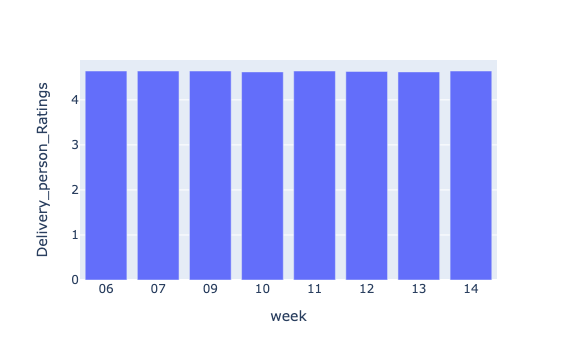

In [48]:
df1['week'] = df1['Order_Date'].dt.strftime("%U")
cols = ['Delivery_person_Ratings','ID','week']
df_aux = df1.loc[:,cols].groupby('week').mean().round(2).reset_index()


px.bar (df_aux, x='week', y='Delivery_person_Ratings')

, mostrando a média de avaliações das entregas feitas por condições climáticas

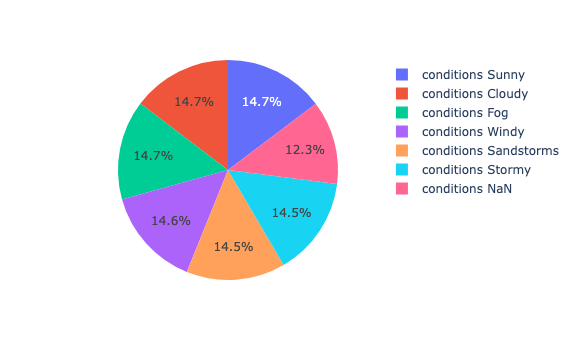

In [52]:
cols = ['Delivery_person_Ratings','Weatherconditions']

df_aux = df1.loc[:,cols].groupby(['Weatherconditions']).mean().round(2).reset_index()

px.pie (df_aux, values='Delivery_person_Ratings', names='Weatherconditions')

In [27]:
df2 = df1['Weatherconditions'].unique()
print(df2)

['conditions Sunny' 'conditions Stormy' 'conditions Sandstorms'
 'conditions Cloudy' 'conditions Fog' 'conditions Windy' 'conditions NaN']


# Visão: Entregadores

## 1. Qual a menor e a maior idade dos entregadores

In [ ]:
print ( 'A maior idade é: {}'.format ( df1.loc[:, 'Delivery_person_Age'].max()))
print ( 'A menor idade é: {}'.format ( df1.loc[:, 'Delivery_person_Age'].min()))

## 2. A pior e a melhor condição de veiculos

In [ ]:
print('A melhor condição de veiculo é: {}' .format ( df1.loc[:,'Vehicle_condition'].max()))
print('A pior condição de veiculo é: {}' .format ( df1.loc[:,'Vehicle_condition'].min()))

## 3. A Avaliação média por entregador

In [59]:
df_avg_ratings_per_delivery = df1.loc[:,['Delivery_person_ID','Delivery_person_Ratings']].groupby('Delivery_person_ID').mean().round(2).reset_index()

## 4. A avaliação média e o desvio padrão por tipo de tráfego

In [68]:
df_avg_ratings_per_traffic = (df1.loc[:,['Delivery_person_Ratings','Road_traffic_density']]
                              .groupby('Road_traffic_density').agg({'Delivery_person_Ratings' : ['mean','std']}))

#renome da coluna
df_avg_ratings_per_traffic.columns = ['delivery_mean','delivery_std']

#reset index
df_avg_ratings_per_traffic = df_avg_ratings_per_traffic.reset_index()

df_avg_ratings_per_traffic

,Road_traffic_density,delivery_mean,delivery_std
0,High,4.653492,0.272312
1,Jam,4.595395,0.328749
2,Low,4.646780,0.335426
3,Medium,4.660627,0.273472
4,NaN,3.912088,2.479464


## 5. A avaliação média e o desvio padrão por condições climáticas

In [71]:
df_avg_ratings_per_conditions = (df1.loc[:,['Delivery_person_Ratings','Weatherconditions']]
                              .groupby('Weatherconditions').agg({'Delivery_person_Ratings' : ['mean','std']}))

#renome da coluna
df_avg_ratings_per_conditions.columns = ['delivery_mean','delivery_std']

#reset index
df_avg_ratings_per_conditions = df_avg_ratings_per_conditions.reset_index()

## 6. Os 10 entregadores mais rapidos por cidade

In [7]:
df1.loc[:,['Delivery_person_ID','City','Time_taken(min)']].groupby(['City','Delivery_person_ID']).min().sort_values(['City','Time_taken(min)'])

Time_taken(min)
City          Delivery_person_ID                 
Metropolitian AGRRES010DEL03                   10
              AGRRES07DEL03                    10
              AGRRES12DEL01                    10
              AGRRES14DEL01                    10
              AGRRES17DEL03                    10
...                                           ...
Urban         DEHRES02DEL03                    41
              BHPRES03DEL02                    42
              AURGRES17DEL03                   43
              LUDHRES16DEL03                   47
              KOLRES19DEL03                    51

[3403 rows x 1 columns]

# A visão dos Restaurantes

## A quantidade de entregadores unicos

In [10]:
delivery_unique = len(df1.loc[:,'Delivery_person_ID'].unique())
print(f'A quantidade de entregadores unicos são: {delivery_unique}')

A quantidade de entregadores unicos são: 1320


## A distância média dos restaurantes e dos locais de entrega.

In [44]:
cols = ['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude']
df1['distance'] = df1.loc[:,cols].apply(lambda x: haversine( (x['Restaurant_latitude'],x['Restaurant_longitude']), (x['Delivery_location_latitude'], x['Delivery_location_longitude'])), axis=1)

avg_distance = df1['distance'].mean()

print('A distancia média das entregas é: {:.2f} KM'.format(avg_distance))

A distancia média das entregas é: 38.50 KM


## O tempo médio e o desvio padrão de entrega por cidade.

In [15]:
cols = ['City','Time_taken(min)']

df_aux = df1.loc[:,cols].groupby('City').agg({'Time_taken(min)' : ['mean','std']})

df_aux.columns = ['avg_time','std_time']

df_aux = df_aux.reset_index()

fig = go.Figure()
fig.add_trace(go.bar(name='Control',
                        x=df_aux['City'],
                        y=df_aux['avg_time'],
                        error_y=dict(type='data', array=df_aux['std_time'])))

fig.update_layout(barmode='group')


## O tempo médio e o desvio padrão de entrega por cidade e tipo de pedido

In [28]:
cols = ['City','Time_taken(min)','Type_of_order']

df_aux = df1.loc[:,cols].groupby(['Type_of_order','City']).agg({'Time_taken(min)' : ['mean','std']})

df_aux.columns = ['avg_time','std_time']

df_aux = df_aux.reset_index()

df_aux

,Type_of_order,City,avg_time,std_time
0,Buffet,Metropolitian,27.258509,9.181257
1,Buffet,Semi-Urban,49.707317,2.731702
2,Buffet,Urban,23.448729,9.084218
3,Drinks,Metropolitian,27.267952,9.068615
4,Drinks,Semi-Urban,49.625000,2.459347
5,Drinks,Urban,23.152766,8.973997
6,Meal,Metropolitian,27.545644,9.250705
7,Meal,Semi-Urban,50.300000,3.041665
8,Meal,Urban,22.943921,8.790535
9,Snack,Metropolitian,27.415601,9.147171


## O tempo médio e desvio padrão de entrega por cidade e tipo de tráfego

In [27]:
cols = ['City','Time_taken(min)','Road_traffic_density']

df_aux = df1.loc[:,cols].groupby(['Road_traffic_density','City']).agg({'Time_taken(min)' : ['mean','std']})

df_aux.columns = ['avg_time','std_time']

df_aux = df_aux.reset_index()

df_aux

,Road_traffic_density,City,avg_time,std_time
0,High,Metropolitian,28.103888,7.935947
1,High,Semi-Urban,50.125000,2.629956
2,High,Urban,24.206081,8.535574
3,Jam,Metropolitian,31.937908,9.509890
4,Jam,Semi-Urban,49.841270,2.717095
5,Jam,Urban,27.905200,10.125553
6,Low,Metropolitian,22.193973,6.827415
7,Low,Urban,19.336444,6.351539
8,Medium,Metropolitian,27.694076,8.332809
9,Medium,Semi-Urban,47.400000,2.011080


## O tempo médio de entrega durantes os festivais

In [40]:
cols = ['Festival', 'Time_taken(min)']

df_aux = df1.loc[:,cols].groupby('Festival').mean()

df_aux.columns = ['avg_time']
df_aux = df_aux.reset_index()

linhas_selecionadas = df_aux['Festival'] == 'Yes'
df_aux = df_aux.loc[linhas_selecionadas,:]

df_aux


,Festival,avg_time
1,Yes,45.51976


In [ ]:
cols = ['Delivery_location_latitude', 'Delivery_location_longitude', 'Restaurant_latitude','Restaurant_longitude']
df1['distance'] = df1.loc[:, cols].apply(lambda x:
                                        haversine( (x['Restaurant_latitude'], x['Restaurant_longitude']),
                                                    (x['Delivery_location_latitude'], x['Delivery_location_longitude']) ), axis=1)

avg_distance = df1.loc[:,['City','distance']].groupby('City').mean().reset_index()

fig = go.Figure( data=[go.pie(labels=avg_distance['City'],values=avg_distance['distance'],pull=[0,0.1,0])])